# Gridded Monthly Hydrographic Climatology

This tutorial will show you how to perform some monthly climatology calculation using nemo outputs.

The idea is to calculate the climatology of SST, SSS and PEA though a series of NC NEMO output files

This tutorial will also show will how to open ZARR files using NEMO and how to process this data though the pipelines


## Open a list of NC files

### Import functions

In [1]:
import coast
import glob
import xarray as xr
%load_ext autoreload
%autoreload 2

/mnt/code/.pyenv/versions/3.10.12/envs/coast-10/lib/python3.10/site-packages/utide/harmonics.py:16: RuntimeWarning: invalid value encountered in cast
  nshallow = np.ma.masked_invalid(const.nshallow).astype(int)
/mnt/code/.pyenv/versions/3.10.12/envs/coast-10/lib/python3.10/site-packages/utide/harmonics.py:17: RuntimeWarning: invalid value encountered in cast
  ishallow = np.ma.masked_invalid(const.ishallow).astype(int) - 1


### Set the files path that you will use

In [2]:
# Path to a data file
root = "./"
dn_files = root + "./example_files/"
fn_nemo_dom  = dn_files + "coast_domain_monthly_grid.nc"
fn_nemo_dat_path  = dn_files + "coast_monthly/grid_files/"
fn_config_t_grid = root + "./example_nemo_monthly_climate.json"

## Specify years to average

In [3]:
#Specify years to average
ystart=1990
ystop=2019


### Make a list of files

In [18]:
#make list of filenames
fn_nemo_dat = glob.glob(fn_nemo_dat_path + "*.nc")

It will create a list of nc files. We will use this list as an input of the Griddded method

### Instantiate the Griddded Classes

In [19]:
nemo = coast.Gridded(fn_data=fn_nemo_dat, fn_domain =fn_nemo_dom, config=fn_config_t_grid,multiple=True)
nemo_dom=coast.Gridded(fn_domain = fn_nemo_dom, config=fn_config_t_grid)

[]

### Add a variable that is important for the output

In [21]:
nemo.dataset['e3_0']=nemo_dom.dataset['e3_0']

NameError: name 'nemo_dom' is not defined

### Calculate the output

In [ ]:
gridded_month = coast.GriddedMonthlyHydrographicClimatology(nemo,z_max=200)
gridded_month.calc_climatologies()

In [ ]:
gridded_month.dataset

## Open ZARR files

### Requirements

Coast also has the capability to allow you to open zarr files
In order to do that, you need to install first the library zarr:
```bash
pip install zarr
```

After that, you can open the datasets

In [4]:
fn_nemo_dom_mask = "https://noc-msm-o.s3-ext.jc.rl.ac.uk/n06-coast-testing/mask.zarr"
fn_nemo_dom_mesh_zgr = "https://noc-msm-o.s3-ext.jc.rl.ac.uk/n06-coast-testing/mesh_zgr.zarr"
fn_nemo_dom_mesh_hgr = "https://noc-msm-o.s3-ext.jc.rl.ac.uk/n06-coast-testing/mesh_hgr.zarr"
fn_nemo_dat = "https://noc-msm-o.s3-ext.jc.rl.ac.uk/n06-coast-testing/n06_T.zarr"

In this case, we will use the same configuration files as we used above: `fn_config_t_grid`

### Open the zarr files as a XARRAY

The zarr files that we are using in this example do not have all the variables on the same file. Because of that, we need to open each file separately and then add the variables to a central file

We will do the same steps for the dom and for the data files

In [5]:
dom = xr.open_zarr(fn_nemo_dom_mask)
mesh_zgr = xr.open_zarr(fn_nemo_dom_mesh_zgr)
mesh_hgr = xr.open_zarr(fn_nemo_dom_mesh_hgr)

In [6]:
for var_name in mesh_zgr.data_vars:
    dom[var_name] = mesh_zgr[var_name]
for var_name in mesh_hgr.data_vars:
    dom[var_name] = mesh_hgr[var_name]

In [7]:
u_grid = xr.open_zarr("https://noc-msm-o.s3-ext.jc.rl.ac.uk/n06-coast-testing/n06_U.zarr")
u_grid = u_grid.isel(time_counter=slice(0,119)).rename({'depthu': 'depth'})
v_grid = xr.open_zarr("https://noc-msm-o.s3-ext.jc.rl.ac.uk/n06-coast-testing/n06_V.zarr")
v_grid = v_grid.isel(time_counter=slice(0,119)).rename({'depthv': 'depth'})
t_grid = xr.open_zarr("https://noc-msm-o.s3-ext.jc.rl.ac.uk/n06-coast-testing/n06_T.zarr")
t_grid = t_grid.rename({'deptht': 'depth'})

In [8]:
for var_name in u_grid.data_vars:
    t_grid[var_name] = u_grid[var_name]
for var_name in v_grid.data_vars:
    t_grid[var_name] = v_grid[var_name]

/mnt/code/.pyenv/versions/3.10.12/envs/coast-10/lib/python3.10/site-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 15
  result = blockwise(
/mnt/code/.pyenv/versions/3.10.12/envs/coast-10/lib/python3.10/site-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 15
  result = blockwise(


In [9]:
dom

<xarray.Dataset>
Dimensions:       (t: 1, z: 75, y: 3059, x: 4322)
Dimensions without coordinates: t, z, y, x
Data variables: (12/42)
    fmask         (t, z, y, x) int8 dask.array<chunksize=(1, 10, 383, 541), meta=np.ndarray>
    fmaskutil     (t, y, x) int8 dask.array<chunksize=(1, 765, 1081), meta=np.ndarray>
    nav_lat       (y, x) float32 dask.array<chunksize=(383, 541), meta=np.ndarray>
    nav_lev       (z) float32 dask.array<chunksize=(75,), meta=np.ndarray>
    nav_lon       (y, x) float32 dask.array<chunksize=(383, 541), meta=np.ndarray>
    time_counter  (t) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    ...            ...
    glamu         (t, y, x) float32 dask.array<chunksize=(1, 383, 541), meta=np.ndarray>
    glamv         (t, y, x) float32 dask.array<chunksize=(1, 383, 541), meta=np.ndarray>
    gphif         (t, y, x) float32 dask.array<chunksize=(1, 383, 541), meta=np.ndarray>
    gphit         (t, y, x) float32 dask.array<chunksize=(1, 383, 541), meta=np.ndarray>
    gphiu         (t, y, x) float32 dask.array<chunksize=(1, 383, 541), meta=np.ndarray>
    gphiv         (t, y, x) float32 dask.array<chunksize=(1, 383, 541), meta=np.ndarray>
Attributes:
    DOMAIN_number_total:  8972
    DOMAIN_size_global:   [4322, 3059]

In [10]:
t_grid

<xarray.Dataset>
Dimensions:       (depth: 75, time_counter: 119, y: 3059, x: 4322)
Coordinates:
  * depth         (depth) float32 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
  * time_counter  (time_counter) datetime64[ns] 1960-01-06T12:00:00 ... 1969-...
    nav_lat       (y, x) float32 dask.array<chunksize=(577, 577), meta=np.ndarray>
    nav_lon       (y, x) float32 dask.array<chunksize=(577, 577), meta=np.ndarray>
Dimensions without coordinates: y, x
Data variables: (12/23)
    e3t           (time_counter, depth, y, x) float32 dask.array<chunksize=(1, 5, 577, 577), meta=np.ndarray>
    mldkz5        (time_counter, y, x) float32 dask.array<chunksize=(1, 577, 577), meta=np.ndarray>
    mldr10_1      (time_counter, y, x) float32 dask.array<chunksize=(1, 577, 577), meta=np.ndarray>
    potemp        (time_counter, depth, y, x) float32 dask.array<chunksize=(1, 5, 577, 577), meta=np.ndarray>
    rsntds        (time_counter, y, x) float32 dask.array<chunksize=(1, 577, 577), meta=np.ndarray>
    salin         (time_counter, depth, y, x) float32 dask.array<chunksize=(1, 5, 577, 577), meta=np.ndarray>
    ...            ...
    tauuo         (time_counter, y, x) float32 dask.array<chunksize=(1, 577, 577), meta=np.ndarray>
    uo            (time_counter, depth, y, x) float32 dask.array<chunksize=(1, 5, 577, 577), meta=np.ndarray>
    uos           (time_counter, y, x) float32 dask.array<chunksize=(1, 577, 577), meta=np.ndarray>
    tauvo         (time_counter, y, x) float32 dask.array<chunksize=(1, 577, 577), meta=np.ndarray>
    vo            (time_counter, depth, y, x) float32 dask.array<chunksize=(1, 5, 577, 577), meta=np.ndarray>
    vos           (time_counter, y, x) float32 dask.array<chunksize=(1, 577, 577), meta=np.ndarray>
Attributes:
    DOMAIN_number_total:  80
    DOMAIN_size_global:   [4322, 3059]
    conventions:          CF-1.1
    description:          ocean T grid variables
    ibegin:               1
    jbegin:               1
    name:                 ORCA0083-N06_1m_19591222_19601231
    ni:                   4322
    nj:                   39
    production:           An IPSL model
    timeStamp:            2014-Dec-03 05:19:35 GMT

### Slice the zarr files

Because zarr files are optimized for cloud, when we instantiate an xarray dataset, we do not open the zarr by it self. We only open some metadata related to the file. The files will only be downloaed when we need to perform some processing on the data

In [11]:
dom = dom.isel(y=slice(500, 700), x=slice(1000,1200))

In [12]:
t_grid = t_grid.isel(y=slice(500, 700), x=slice(1000,1200), time_counter=slice(0,24))

### Next steps

The next steps will be the same as if you were working with nc files

- Instantiate the classes

In this step, it is important to mention that our zarr data does not have bathymetry data. In this case, we will may see some warning while using this data

In [13]:
dom

<xarray.Dataset>
Dimensions:       (t: 1, z: 75, y: 200, x: 200)
Dimensions without coordinates: t, z, y, x
Data variables: (12/42)
    fmask         (t, z, y, x) int8 dask.array<chunksize=(1, 10, 200, 82), meta=np.ndarray>
    fmaskutil     (t, y, x) int8 dask.array<chunksize=(1, 200, 81), meta=np.ndarray>
    nav_lat       (y, x) float32 dask.array<chunksize=(200, 82), meta=np.ndarray>
    nav_lev       (z) float32 dask.array<chunksize=(75,), meta=np.ndarray>
    nav_lon       (y, x) float32 dask.array<chunksize=(200, 82), meta=np.ndarray>
    time_counter  (t) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    ...            ...
    glamu         (t, y, x) float32 dask.array<chunksize=(1, 200, 82), meta=np.ndarray>
    glamv         (t, y, x) float32 dask.array<chunksize=(1, 200, 82), meta=np.ndarray>
    gphif         (t, y, x) float32 dask.array<chunksize=(1, 200, 82), meta=np.ndarray>
    gphit         (t, y, x) float32 dask.array<chunksize=(1, 200, 82), meta=np.ndarray>
    gphiu         (t, y, x) float32 dask.array<chunksize=(1, 200, 82), meta=np.ndarray>
    gphiv         (t, y, x) float32 dask.array<chunksize=(1, 200, 82), meta=np.ndarray>
Attributes:
    DOMAIN_number_total:  8972
    DOMAIN_size_global:   [4322, 3059]

In [14]:
t_grid

<xarray.Dataset>
Dimensions:       (depth: 75, time_counter: 24, y: 200, x: 200)
Coordinates:
  * depth         (depth) float32 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
  * time_counter  (time_counter) datetime64[ns] 1960-01-06T12:00:00 ... 1961-...
    nav_lat       (y, x) float32 dask.array<chunksize=(77, 154), meta=np.ndarray>
    nav_lon       (y, x) float32 dask.array<chunksize=(77, 154), meta=np.ndarray>
Dimensions without coordinates: y, x
Data variables: (12/23)
    e3t           (time_counter, depth, y, x) float32 dask.array<chunksize=(1, 5, 77, 154), meta=np.ndarray>
    mldkz5        (time_counter, y, x) float32 dask.array<chunksize=(1, 77, 154), meta=np.ndarray>
    mldr10_1      (time_counter, y, x) float32 dask.array<chunksize=(1, 77, 154), meta=np.ndarray>
    potemp        (time_counter, depth, y, x) float32 dask.array<chunksize=(1, 5, 77, 154), meta=np.ndarray>
    rsntds        (time_counter, y, x) float32 dask.array<chunksize=(1, 77, 154), meta=np.ndarray>
    salin         (time_counter, depth, y, x) float32 dask.array<chunksize=(1, 5, 77, 154), meta=np.ndarray>
    ...            ...
    tauuo         (time_counter, y, x) float32 dask.array<chunksize=(1, 77, 154), meta=np.ndarray>
    uo            (time_counter, depth, y, x) float32 dask.array<chunksize=(1, 5, 77, 154), meta=np.ndarray>
    uos           (time_counter, y, x) float32 dask.array<chunksize=(1, 77, 154), meta=np.ndarray>
    tauvo         (time_counter, y, x) float32 dask.array<chunksize=(1, 77, 154), meta=np.ndarray>
    vo            (time_counter, depth, y, x) float32 dask.array<chunksize=(1, 5, 77, 154), meta=np.ndarray>
    vos           (time_counter, y, x) float32 dask.array<chunksize=(1, 77, 154), meta=np.ndarray>
Attributes:
    DOMAIN_number_total:  80
    DOMAIN_size_global:   [4322, 3059]
    conventions:          CF-1.1
    description:          ocean T grid variables
    ibegin:               1
    jbegin:               1
    name:                 ORCA0083-N06_1m_19591222_19601231
    ni:                   4322
    nj:                   39
    production:           An IPSL model
    timeStamp:            2014-Dec-03 05:19:35 GMT

In [15]:
nemo_dom=coast.Gridded(fn_domain = dom, config=fn_config_t_grid) #;nemo_dom = nemo_dom. subset_as_copy(y_dim=range(86,1000),x_dim=range(1080,1180))        
nemo = coast.Gridded(fn_data= t_grid, fn_domain = dom, config=fn_config_t_grid)

/mnt/code/code/noc/coast/COAsT/coast/data/gridded.py:229: UserWarning: The model domain loaded, '<xarray.Dataset>
Dimensions:       (t: 1, z: 75, y: 200, x: 200)
Dimensions without coordinates: t, z, y, x
Data variables: (12/42)
    fmask         (t, z, y, x) int8 dask.array<chunksize=(1, 10, 200, 82), meta=np.ndarray>
    fmaskutil     (t, y, x) int8 dask.array<chunksize=(1, 200, 81), meta=np.ndarray>
    nav_lat       (y, x) float32 dask.array<chunksize=(200, 82), meta=np.ndarray>
    nav_lev       (z) float32 dask.array<chunksize=(75,), meta=np.ndarray>
    nav_lon       (y, x) float32 dask.array<chunksize=(200, 82), meta=np.ndarray>
    time_counter  (t) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    ...            ...
    glamu         (t, y, x) float32 dask.array<chunksize=(1, 200, 82), meta=np.ndarray>
    glamv         (t, y, x) float32 dask.array<chunksize=(1, 200, 82), meta=np.ndarray>
    gphif         (t, y, x) float32 dask.array<chunksize=(1, 200, 82), meta=np.nda

- Add a variable that is important for the output

In [16]:
nemo.dataset['e3_0']=nemo_dom.dataset['e3_0']
# nemo_out=coast.Gridded(fn_domain = dom, config=fn_config_t_grid) #nemo_out = nemo_out. subset_as_copy(y_dim=range(86,1000),x_dim=range(1080,1180))  

- Calculate the output

In this step, it is important to mention that our zarr data does not have salinity and temperature data, only sst and ssh. Because of that, it is not possible to calculate PEA.

In [17]:
gridded_month = coast.GriddedMonthlyHydrographicClimatology(nemo,z_max=200)
gridded_month.calc_climatologies()

Calc pea 0
[0]
copied 0
not possible to calculate pea
Month 0
it [ 0 12]


/mnt/code/code/noc/coast/COAsT/coast/_utils/logging_util.py:80: UserWarning: /mnt/code/code/noc/coast/COAsT/coast/diagnostics/gridded_monthly_hydrographic_climatology.py.calc_climatologies.63: Unable to perform pea calculation. Please check the error 'Dataset' object has no attribute 'salinity'
  return warnings.warn(add_info(msg), *args, **kwargs)


Month 1
it [ 1 13]
Month 2
it [ 2 14]
Month 3
it [ 3 15]
Month 4
it [ 4 16]
Month 5
it [ 5 17]
Month 6
it [ 6 18]
Month 7
it [ 7 19]
Month 8
it [ 8 20]
Month 9
it [ 9 21]
Month 10
it [10 22]
Month 11
it [11 23]


In [18]:
gridded_month.dataset

<xarray.Dataset>
Dimensions:          (depth: 75, t_dim: 24, y_dim: 200, x_dim: 200, z_dim: 75,
                      mon_dim: 12)
Coordinates:
  * depth            (depth) float32 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
  * time             (t_dim) datetime64[ns] 1960-01-06T12:00:00 ... 1961-12-1...
    longitude        (y_dim, x_dim) float32 dask.array<chunksize=(200, 82), meta=np.ndarray>
    latitude         (y_dim, x_dim) float32 dask.array<chunksize=(200, 82), meta=np.ndarray>
    depth_0          (z_dim, y_dim, x_dim) float64 0.5 0.5 ... 5.86e+03
    Months           (mon_dim) int64 0 1 2 3 4 5 6 7 8 9 10 11
Dimensions without coordinates: t_dim, y_dim, x_dim, z_dim, mon_dim
Data variables: (12/32)
    e3t              (t_dim, depth, y_dim, x_dim) float32 dask.array<chunksize=(1, 5, 77, 154), meta=np.ndarray>
    mldkz5           (t_dim, y_dim, x_dim) float32 dask.array<chunksize=(1, 77, 154), meta=np.ndarray>
    mldr10_1         (t_dim, y_dim, x_dim) float32 dask.array<chunksize=(1, 77, 154), meta=np.ndarray>
    potemp           (t_dim, depth, y_dim, x_dim) float32 dask.array<chunksize=(1, 5, 77, 154), meta=np.ndarray>
    rsntds           (t_dim, y_dim, x_dim) float32 dask.array<chunksize=(1, 77, 154), meta=np.ndarray>
    salin            (t_dim, depth, y_dim, x_dim) float32 dask.array<chunksize=(1, 5, 77, 154), meta=np.ndarray>
    ...               ...
    e3_0             (z_dim, y_dim, x_dim) float64 dask.array<chunksize=(5, 76, 82), meta=np.ndarray>
    mask             (z_dim, y_dim, x_dim) int8 dask.array<chunksize=(10, 200, 82), meta=np.ndarray>
    bottom_level     (y_dim, x_dim) int16 dask.array<chunksize=(200, 81), meta=np.ndarray>
    sst_monthy_clim  (mon_dim, y_dim, x_dim) float64 0.3749 0.3554 ... 7.246
    sss_monthy_clim  (mon_dim, y_dim, x_dim) float64 33.72 33.72 ... 34.22 34.22
    pea_monthy_clim  (mon_dim, y_dim, x_dim) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes:
    DOMAIN_number_total:  80
    DOMAIN_size_global:   [4322, 3059]
    conventions:          CF-1.1
    description:          ocean T grid variables
    ibegin:               1
    jbegin:               1
    name:                 ORCA0083-N06_1m_19591222_19601231
    ni:                   4322
    nj:                   39
    production:           An IPSL model
    timeStamp:            2014-Dec-03 05:19:35 GMT

## Output your results

### NETCDF

In [19]:
# gridded_month.dataset.to_netcdf('name_of_output_file.nc')

### Plot the outputs

In [20]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeaturea


/mnt/code/.pyenv/versions/3.10.12/envs/coast-10/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


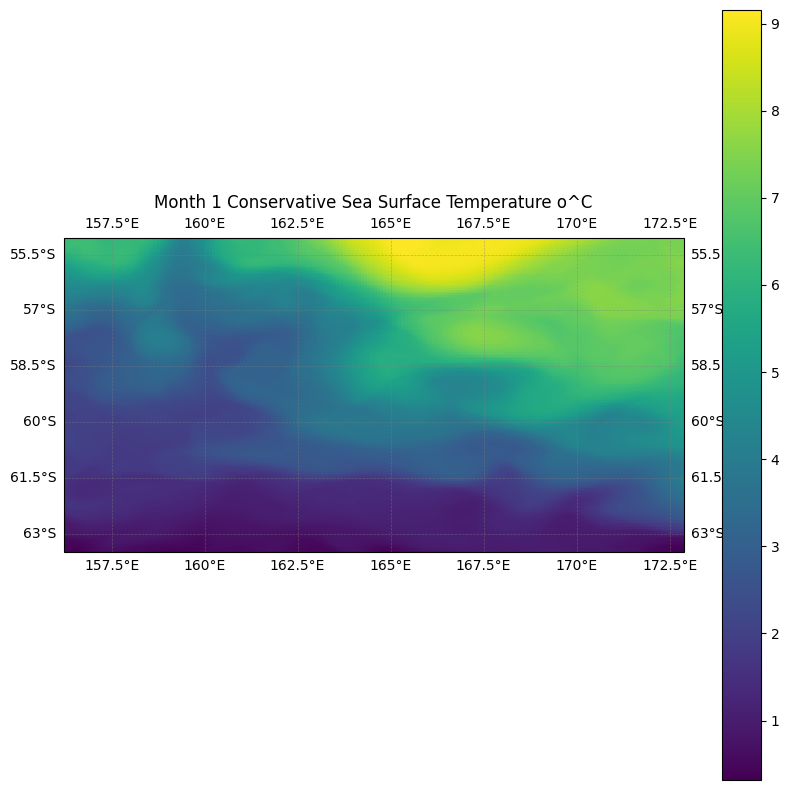

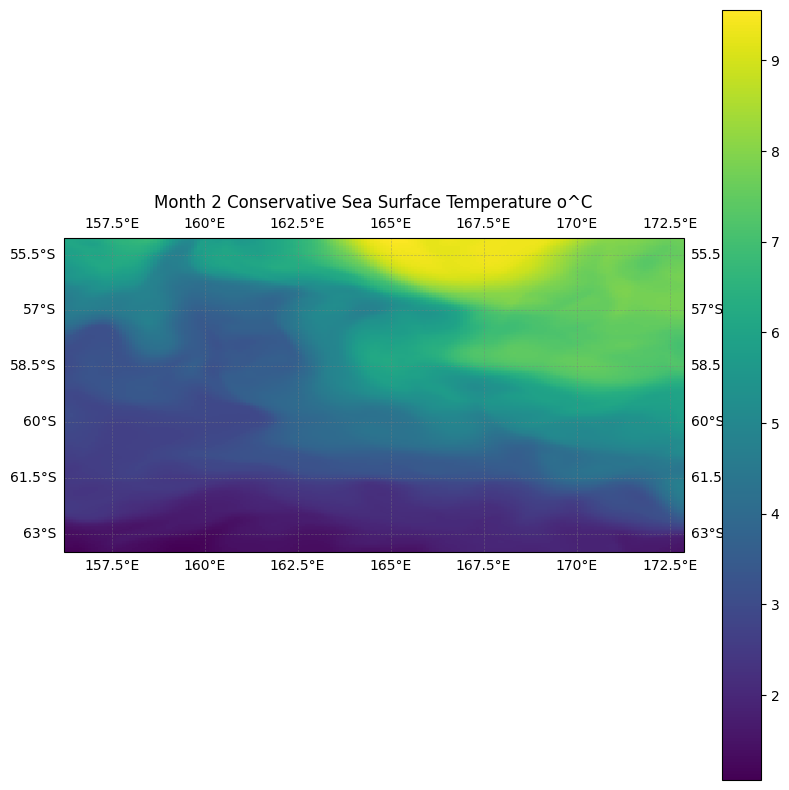

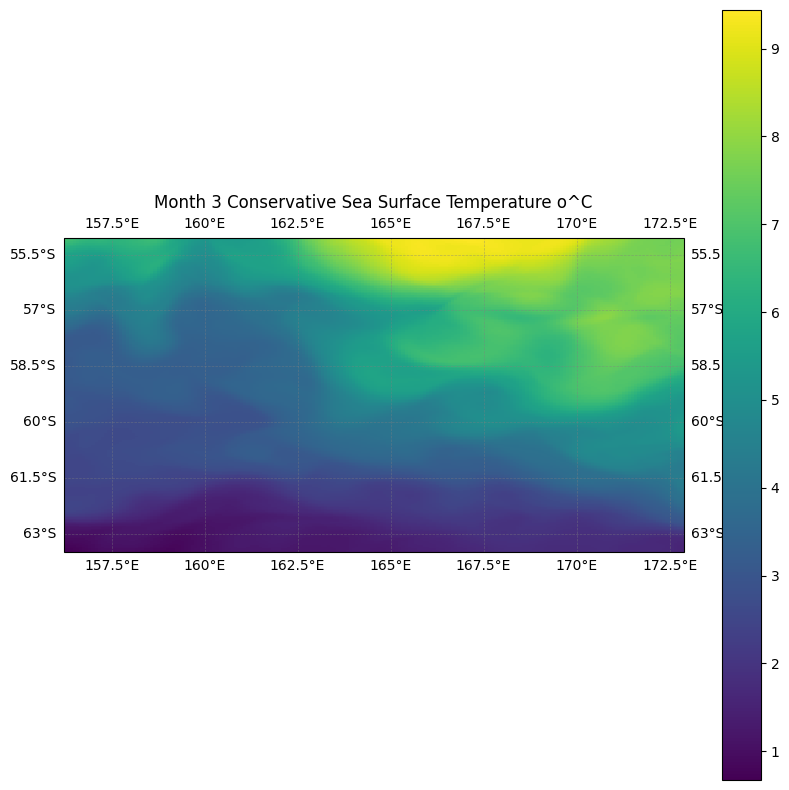

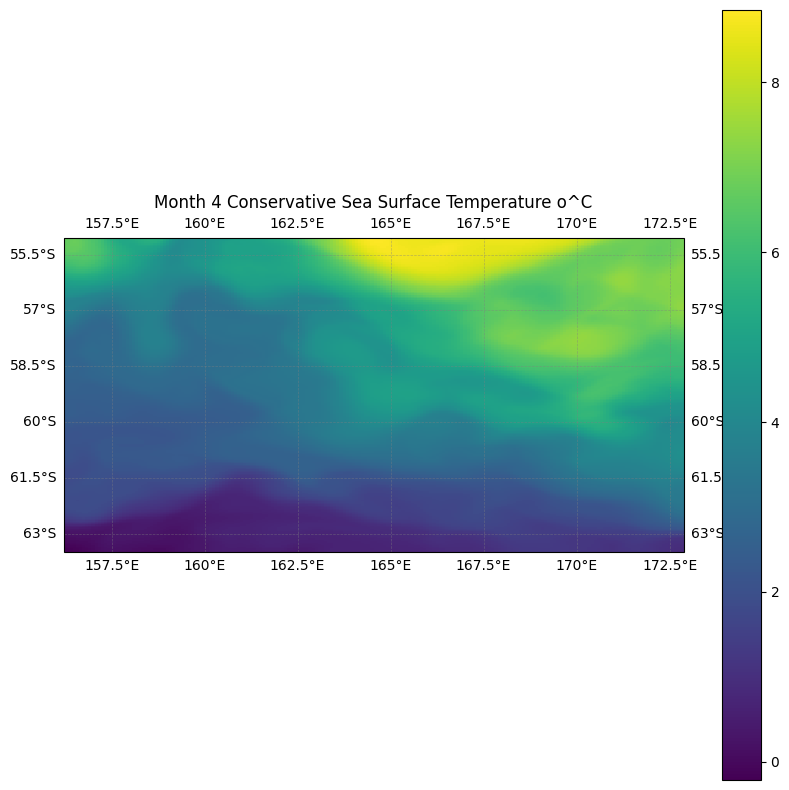

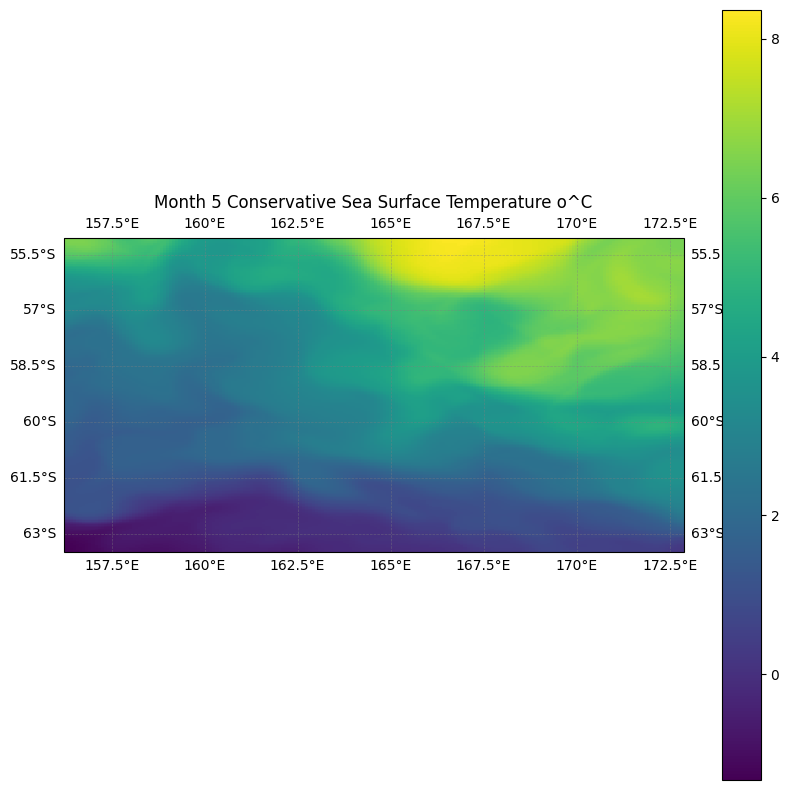

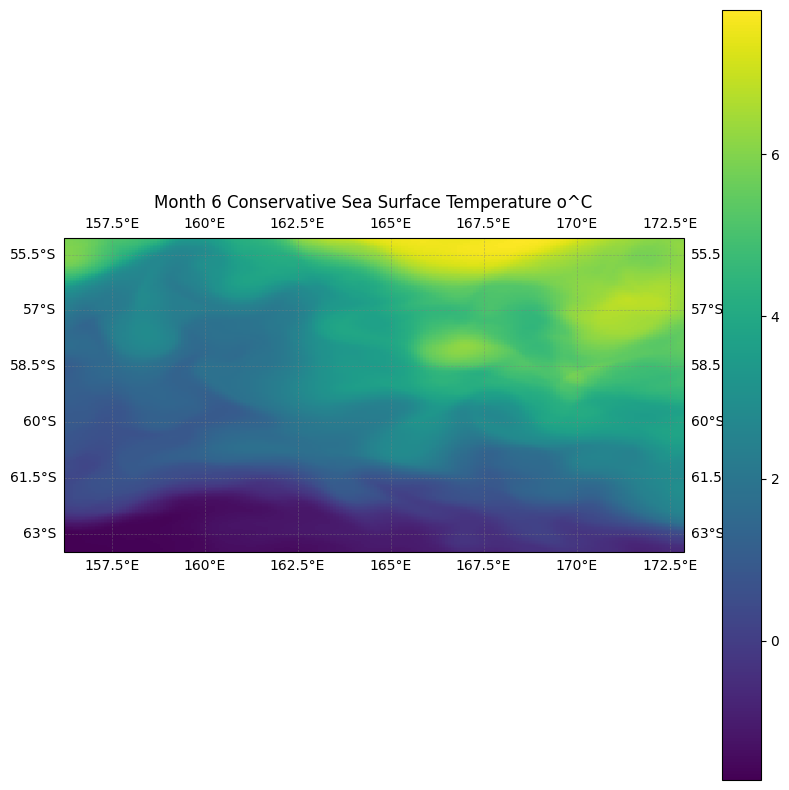

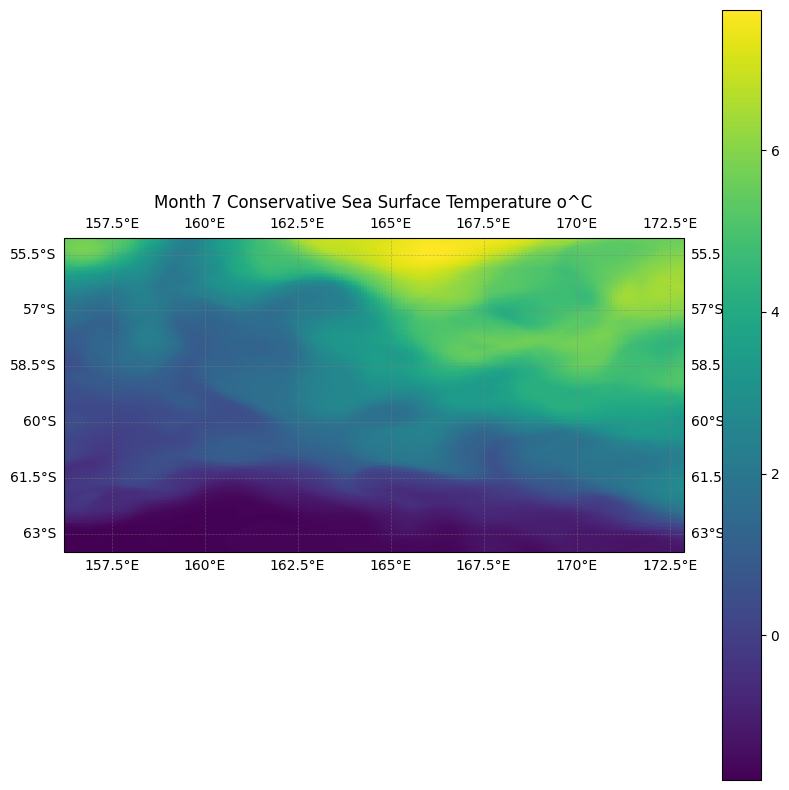

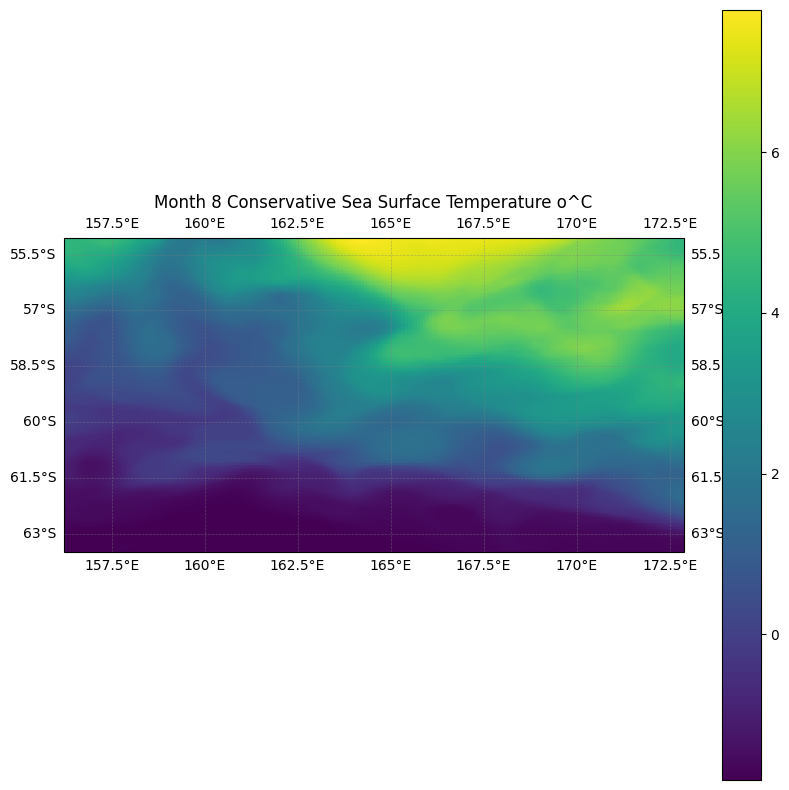

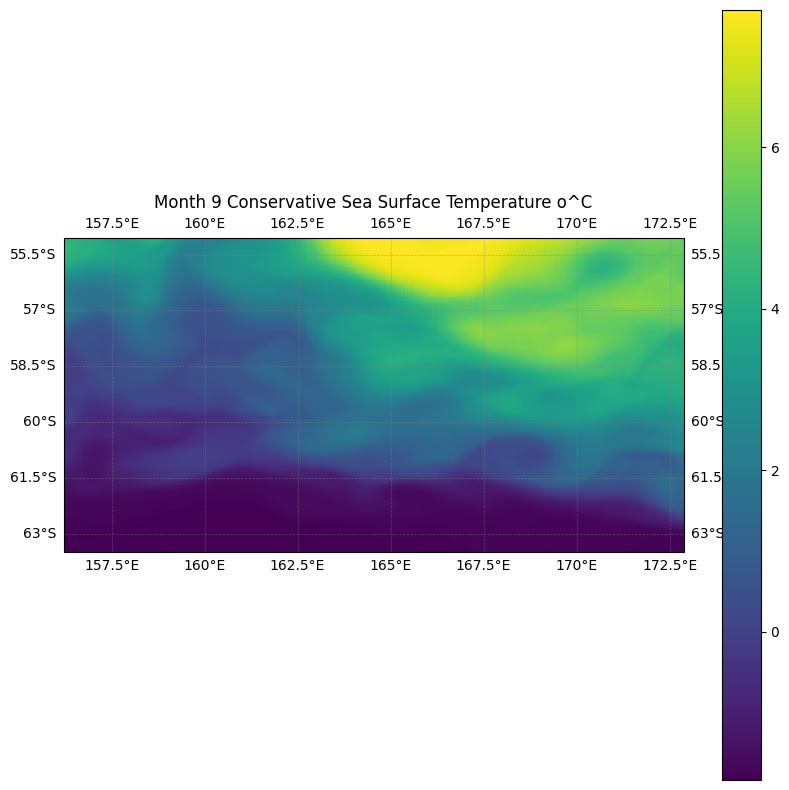

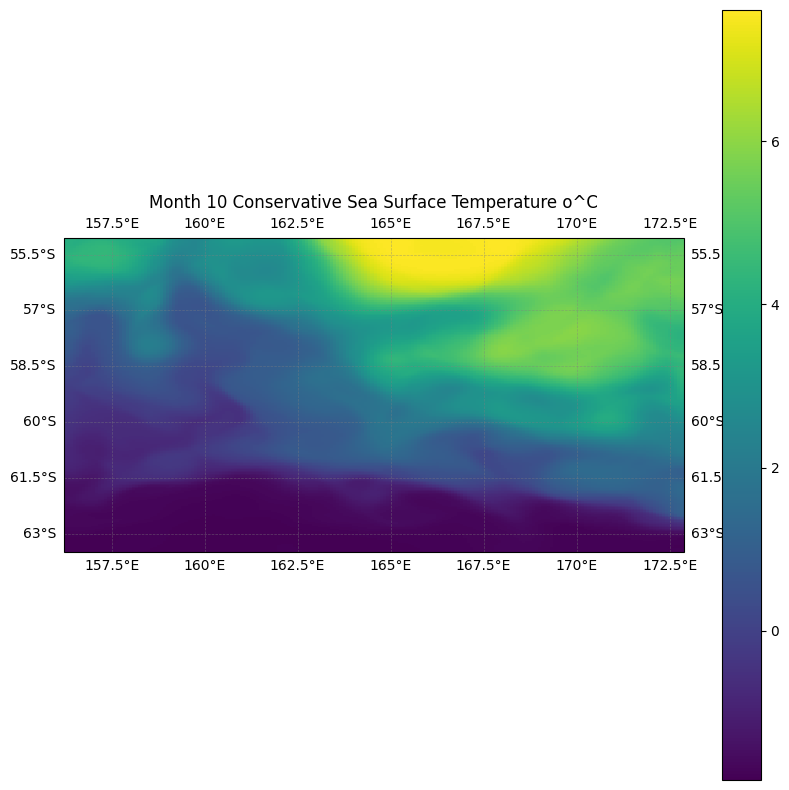

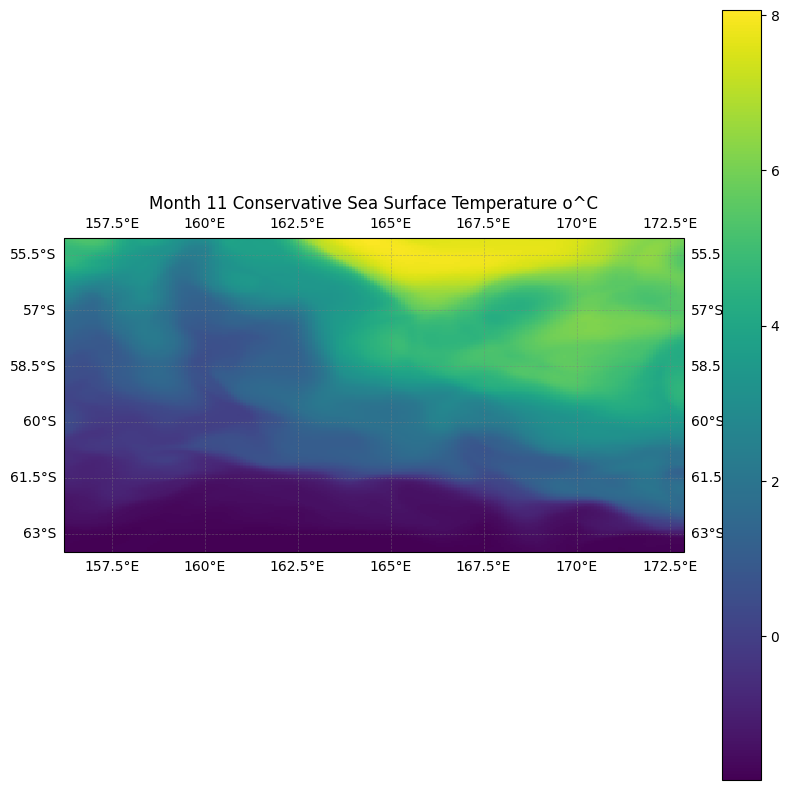

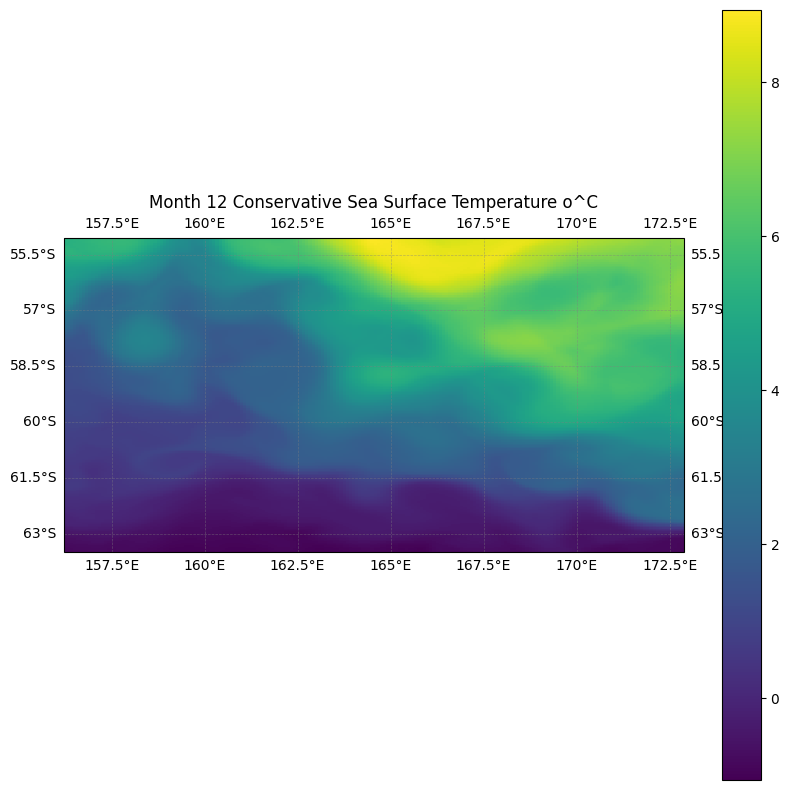

In [21]:
sst_clim = gridded_month.dataset['sst_monthy_clim']
projection = ccrs.PlateCarree()

for month, sst in enumerate(sst_clim):
    fig, ax = plt.subplots(subplot_kw={'projection': projection}, figsize=(10, 10))
    plt.pcolormesh(gridded_month.dataset.longitude.squeeze(), gridded_month.dataset.latitude.squeeze(), sst,transform=projection)
    ax.coastlines()
    ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
    title_str = f"Month {month + 1} {sst_clim.attrs['standard name']} {sst_clim.attrs['units']}"
    plt.title(title_str)
    plt.xlabel("longitude")
    plt.ylabel("latitude")
    plt.colorbar()